In [1]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
dat=pd.read_excel("Data/18c6NapNewnetalsisolated.xlsx")
dat

,Wavelength (nm),Pb,Ba,Sr,Hg,K,Cs,Ag,Rb,Ca,Na,Cd,Mg,Li,Zn,Cu,Me
0,699.980042,0.006464,0.002393,0.002234,0.005217,0.007063,0.000208,0.000905,0.000147,0.008877,-0.002903,0.011762,0.016001,0.003644,0.006893,0.020540,-0.000031
1,694.938049,0.006345,0.001837,0.001792,0.005104,0.006945,0.000503,-0.000466,-0.000254,0.008954,-0.003113,0.010241,0.015443,0.002909,0.007183,0.021603,0.000482
2,690.032227,0.005913,0.001470,0.002391,0.004944,0.006181,-0.000475,-0.000710,-0.001034,0.009782,-0.003383,0.011138,0.015547,0.002922,0.007865,0.023258,-0.000325
3,684.974060,0.006787,0.002684,0.002121,0.005660,0.007353,0.001465,0.000464,0.000029,0.008818,-0.003780,0.012558,0.016129,0.003439,0.010685,0.024566,-0.000904
4,680.052673,0.006324,0.002604,0.002439,0.006119,0.007377,0.000893,0.000088,0.000098,0.008962,-0.003482,0.011813,0.015680,0.004498,0.013193,0.025697,-0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,219.946426,0.719480,0.412409,0.413794,0.539318,0.401881,0.312294,0.380123,0.328057,0.336234,0.324217,0.379450,0.395811,0.343281,0.385825,0.806228,0.361397
97,215.075501,0.989946,0.427991,0.458418,0.576017,0.515987,0.421341,0.509807,0.429166,0.433735,0.453424,0.463055,0.493242,0.459291,0.421283,0.975596,0.476941
98,210.045364,1.469922,0.543763,0.553448,0.646441,0.719962,0.597489,0.692847,0.649382,0.570794,0.624603,0.618672,0.662683,0.636697,0.522792,1.190658,0.687666
99,205.013184,1.752041,0.600510,0.610200,0.702357,0.912059,0.753402,0.871219,0.851141,0.667384,0.819520,0.705798,0.775653,0.770674,0.580550,1.246971,0.843755


In [3]:
x = list(dat['Wavelength (nm)'])
y=[]
a=[]

Order=['Hg','K','Cs','Ag','Rb','Ca','Na','Cd','Mg','Li','Zn','Me']
ColorMap={'Hg':'#ff0000', 'K':'#ff8000','Cs':'#FFC600','Ag':'#C4D300','Rb':'#00ff00','Ca':'#44D7A8','Na':'#00ffff',
          'Cd':'#0080ff', 'Mg':'#0000ff', 'Li':'#8000ff', 'Zn':'#FC8EAC', 'Me':'#ff0080'}
ChargeStates={'Hg':'$^{2+}$', 'K':'$^{+}$','Cs':'$^{+}$','Ag':'$^{+}$','Rb':'$^{+}$','Ca':'$^{2+}$','Na':'$^{+}$',
          'Cd':'$^{2+}$', 'Mg':'$^{2+}$', 'Li':'$^{+}$', 'Zn':'$^{2+}$', 'Me':'$^{+}$','Pb':'$^{2+}$','Cu':'$^{2+}$','Ba':'$^{2+}$','Crown':""}
Names={}
for i in range(0,len(Order)):
    y.append(list(dat[Order[i]]))
    Names[i]=Order[i]+ChargeStates[Order[i]]

    if(Order[i]=='Me'):
        Names[i]=r'NMe$_4^+$'
    if(Order[i]=='Hg Fresh'):
        Names[i]=r'Hg$^{2+}$'
    if(Order[i]=='Cu Fresh'):
        Names[i]=r'Cu$^{2+}'
    a.append(mpatches.Patch(facecolor=ColorMap[Order[i]], label=Names[i], linewidth = 0.5, edgecolor = 'black'))



In [4]:
len(y)

12

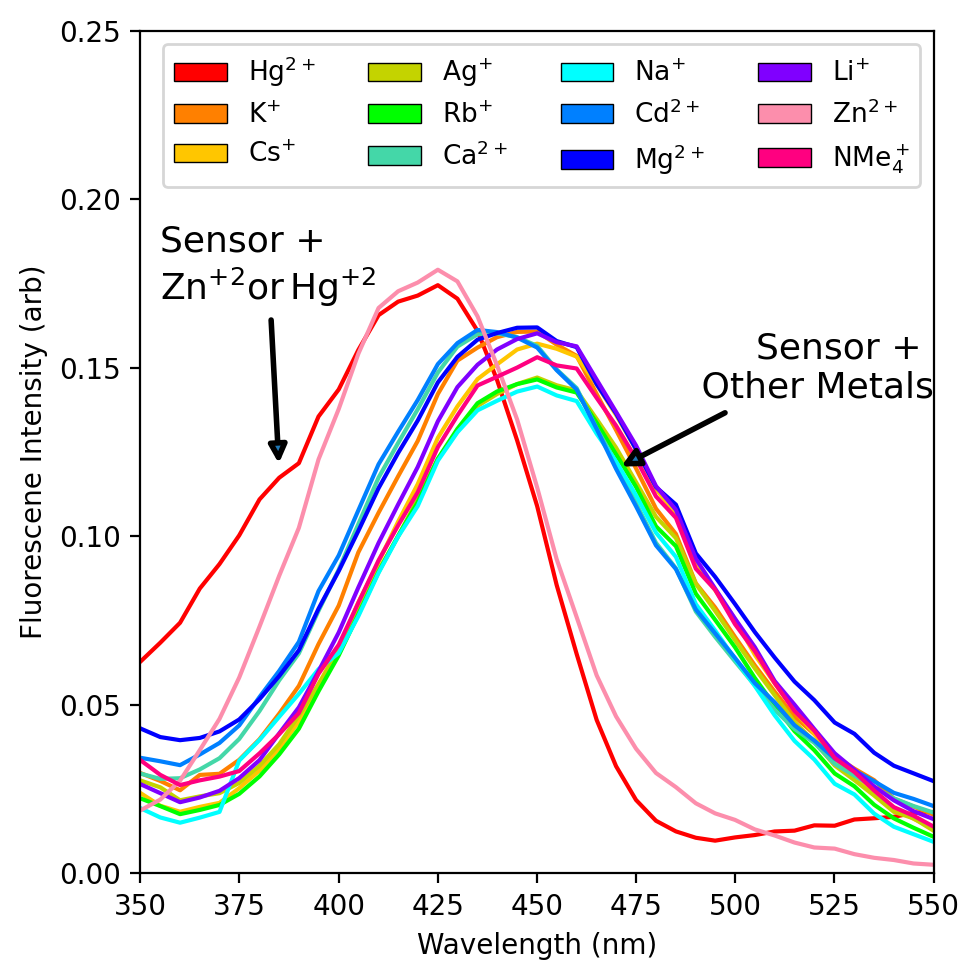

In [5]:
plt.figure(figsize=(5,5),dpi=200)
for i in range(0,len(Order)):
    plt.plot(x,y[i],ColorMap[Order[i]],label=Names[i])
pylab.ylim(0,0.2)
pylab.xlim(350,550)
pylab.xlabel("Wavelength (nm)")
pylab.ylabel("Fluorescene Intensity (arb)")
pylab.legend(handles=a,loc='upper right', ncol=4,fontsize=9.5)
ax = plt.gcf().gca()
ax.annotate('Sensor + \n$\mathregular{Zn^{+2} or\, Hg^{+2} }$', 
            xy=(385, 0.12),
            xycoords='data',
            xytext=(355, 0.18), 
            va='center',
            ha='left',
            fontsize=13,
            arrowprops={'arrowstyle': '-|>', 'lw': 2})

ax.annotate('Sensor + \n Other Metals', 
            xy=(470, 0.12),
            xycoords='data',
            xytext=(550, 0.15), 
            va='center',
            ha='right',
            fontsize=13,
            arrowprops={'arrowstyle': '-|>', 'lw': 2})
plt.ylim(0,0.25)
plt.tight_layout()
plt.savefig('Figs/Figure3B.png',bbox_inches='tight')

plt.show()
